In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [18]:
cccf = pd.read_csv('cccf.csv')
cccf

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.0,peehs_moorhsum,3007.0
1,jora,NaN,NaN,uwi,2906.0
2,lala,NaN,NaN,kal013,2756.0
3,wesnerm,NaN,NaN,wmoise,2696.0
4,grebnesieh,grebnesieh,1703.0,grebnesieh,2673.0
...,...,...,...,...,...
11270,TeaPot,teapot,2677.0,NaN,NaN
11271,luosiyuan,tianbu,2882.0,NaN,NaN
11272,dorijanko,dorijanlendvaj,3120.0,NaN,NaN
11273,gamegame,gamegame,3218.0,NaN,NaN


In [19]:
cccf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11275 entries, 0 to 11274
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ss_username  11275 non-null  object 
 1   cf_username  11068 non-null  object 
 2   cf_rating    7437 non-null   float64
 3   cc_username  10280 non-null  object 
 4   cc_rating    10280 non-null  float64
dtypes: float64(2), object(3)
memory usage: 440.6+ KB


In [20]:
cc=cccf.loc[:,['cc_username','cc_rating']]
cc

,cc_username,cc_rating
0,peehs_moorhsum,3007.0
1,uwi,2906.0
2,kal013,2756.0
3,wmoise,2696.0
4,grebnesieh,2673.0
...,...,...
11270,NaN,NaN
11271,NaN,NaN
11272,NaN,NaN
11273,NaN,NaN


In [21]:
cf=cccf.loc[:,['cf_username','cf_rating']]
cf

,cf_username,cf_rating
0,slime,3449.0
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,grebnesieh,1703.0
...,...,...
11270,teapot,2677.0
11271,tianbu,2882.0
11272,dorijanlendvaj,3120.0
11273,gamegame,3218.0


In [22]:
new=cccf.dropna(how='any')
new


,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.0,peehs_moorhsum,3007.0
4,grebnesieh,grebnesieh,1703.0,grebnesieh,2673.0
5,aurinegro,aurinegro,2202.0,aurinegro,2628.0
6,retrograd,retrograd,2262.0,retrograd,2628.0
7,chris19,anudeep2011,2023.0,anudeep2011,2565.0
...,...,...,...,...,...
10269,Prince_Raj,daud43,624.0,praj0609,580.0
10270,Notanonymous,bhardwajarpit1998,1182.0,arpit_987,569.0
10272,yash1399,yash1399,979.0,yash1399,518.0
10274,hihihihipathak,praveenpathak,1581.0,hihihihipathak,460.0


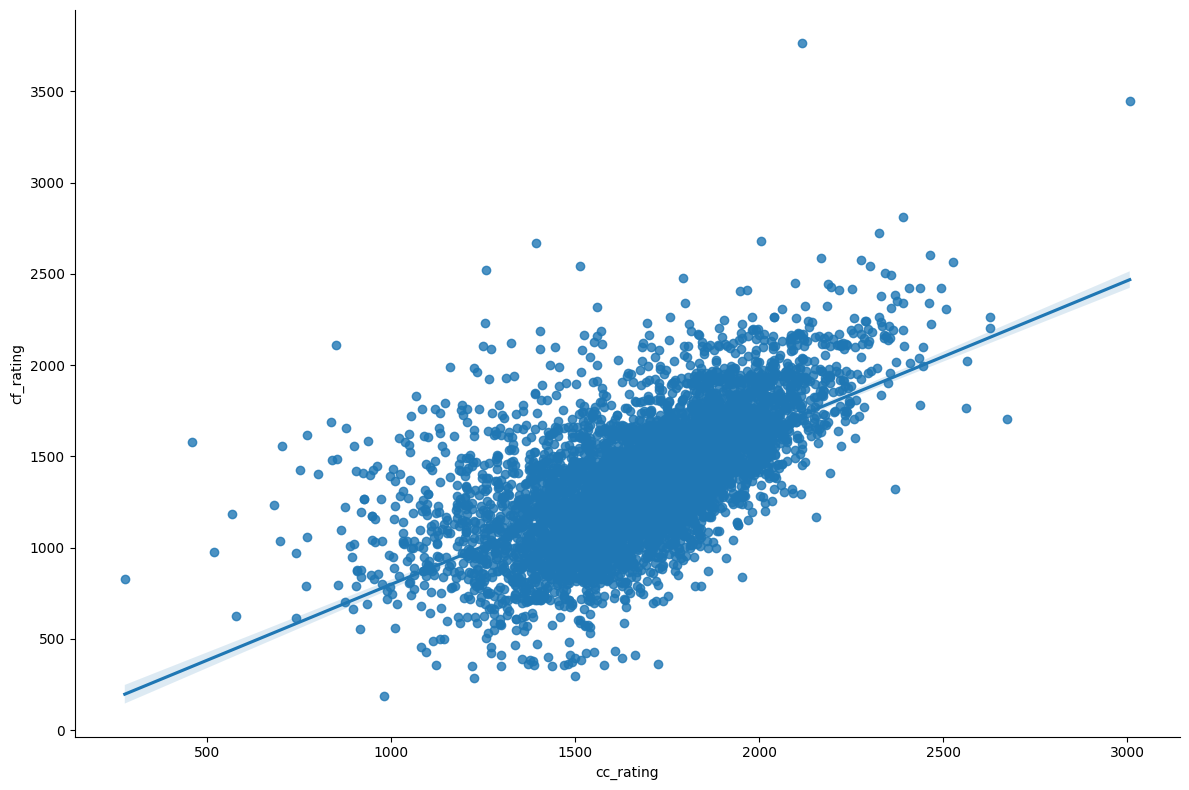

In [23]:
sns.lmplot(
    data=new,
    x="cc_rating", y="cf_rating",height=8, aspect=1.5 , fit_reg=True,scatter=True
)

In [24]:
slope,intercept=np.polyfit(new['cc_rating'],new['cf_rating'],1) # cf=m*cc+b
slope,intercept


(0.8315620555789333, -32.6292650731585)

In [25]:
cc['cc_rating'].corr(cf['cf_rating'])

0.6245876122997065

In [26]:
cccf['cf_rating'] = cccf['cf_rating'].fillna(cccf['cc_rating']*slope+intercept)
cccf['cc_rating'] = cccf['cc_rating'].fillna((cccf['cf_rating']-intercept)/slope) 

In [30]:
final_csv=cccf
final_csv

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.000000,peehs_moorhsum,3007.000000
1,jora,NaN,2383.890068,uwi,2906.000000
2,lala,NaN,2259.155760,kal013,2756.000000
3,wesnerm,NaN,2209.262037,wmoise,2696.000000
4,grebnesieh,grebnesieh,1703.000000,grebnesieh,2673.000000
...,...,...,...,...,...
11270,TeaPot,teapot,2677.000000,NaN,3258.481128
11271,luosiyuan,tianbu,2882.000000,NaN,3505.005123
11272,dorijanko,dorijanlendvaj,3120.000000,NaN,3791.213469
11273,gamegame,gamegame,3218.000000,NaN,3909.063964


In [32]:
final_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11275 entries, 0 to 11274
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ss_username  11275 non-null  object 
 1   cf_username  11068 non-null  object 
 2   cf_rating    11275 non-null  float64
 3   cc_username  10280 non-null  object 
 4   cc_rating    11275 non-null  float64
dtypes: float64(2), object(3)
memory usage: 440.6+ KB


In [ ]:
final_csv.to_csv('final_csv.csv',index=False)